This is just a simple dataloader to get averages of the measurements of each sample and save to csv file

No complex/fancy preprocessing

In [1]:
import os
from sys import stdout
from glob import glob


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
#%matplotlib notebook
%matplotlib inline
#matplotlib.use('nbagg')
#import mpld3
#mpld3.enable_notebook()

from math import sqrt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict

import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import scipy.io

import warnings
warnings.filterwarnings('ignore')

In [2]:
mat = scipy.io.loadmat("./data_new/001_A1_Zanardi_QS277us_200Hz_delay1us_exp1ms.mat")
data = mat["data"]
wl = mat["wl"]
refconc= mat["refconc"]
refconc = refconc[0][0][2]

In [4]:
print(wl[-1])
print(wl.shape)
print(data.shape)

[440.7245]
(4093, 1)
(4093, 536)


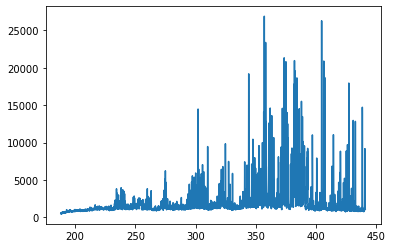

In [7]:
plt.plot(wl, data[:,10])

In [8]:
x= np.arange(len(wl)).reshape(-1,1)
print(x.shape)

(4093, 1)


In [10]:
from glob import glob

#filenames = glob('./ref/*')
filenames = glob('./data_new/*')


dfs = [scipy.io.loadmat(f) for f in filenames]
print(type(dfs)) #dfs is a list of mat files 
print(len(dfs)) #dfs is a list of mat files 

<class 'list'>
60


In [23]:
tot= np.empty((0, len(wl)))


for j in range(0, len(dfs), 3): #loop over all .mat files (now taking every 3 spectra)
    mat = dfs[j]
    data = mat["data"]
    print("data index: " + str(j))
    print("data " + str(j) + " shape: ", data.shape)
    
    count=0

    #result_array = np.empty_like(wl)
    
    tmp = np.empty((0, len(wl)))

    for i in (range(len(data[0])) ):
        
        tmp = np.append(tmp, [data[:,i]], axis=0)

    print("tmp shape: ", tmp.shape)

    #avg_arr= np.mean(tmp, axis=0).reshape((1, -1))
    avg_arr= np.max(tmp, axis=0).reshape((1, -1))
    print("avg array shape: " , avg_arr.shape)
    print("")
    
    
    tot = np.append(tot, avg_arr, axis=0)

print(tot.shape)  

data index: 0
data 0 shape:  (4093, 536)
tmp shape:  (536, 4093)
avg array shape:  (1, 4093)

data index: 3
data 3 shape:  (4093, 533)
tmp shape:  (533, 4093)
avg array shape:  (1, 4093)

data index: 6
data 6 shape:  (4093, 530)
tmp shape:  (530, 4093)
avg array shape:  (1, 4093)

data index: 9
data 9 shape:  (4093, 534)
tmp shape:  (534, 4093)
avg array shape:  (1, 4093)

data index: 12
data 12 shape:  (4093, 558)
tmp shape:  (558, 4093)
avg array shape:  (1, 4093)

data index: 15
data 15 shape:  (4093, 528)
tmp shape:  (528, 4093)
avg array shape:  (1, 4093)

data index: 18
data 18 shape:  (4093, 534)
tmp shape:  (534, 4093)
avg array shape:  (1, 4093)

data index: 21
data 21 shape:  (4093, 543)
tmp shape:  (543, 4093)
avg array shape:  (1, 4093)

data index: 24
data 24 shape:  (4093, 542)
tmp shape:  (542, 4093)
avg array shape:  (1, 4093)

data index: 27
data 27 shape:  (4093, 528)
tmp shape:  (528, 4093)
avg array shape:  (1, 4093)

data index: 30
data 30 shape:  (4093, 533)
tmp s

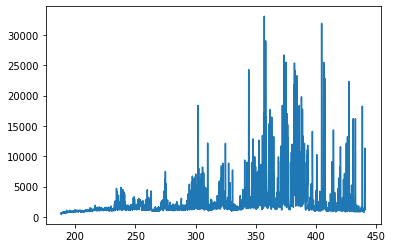

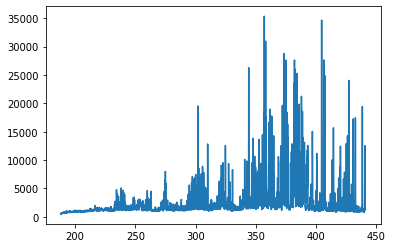

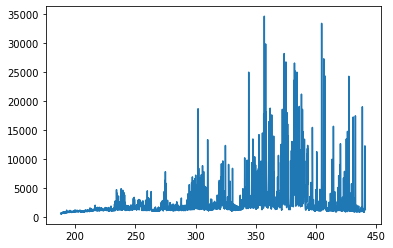

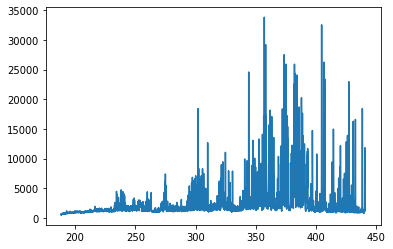

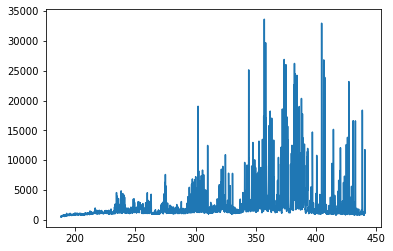

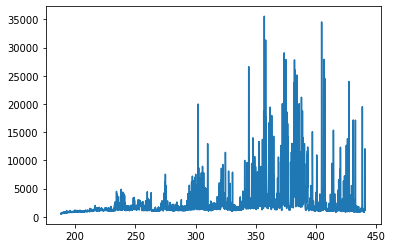

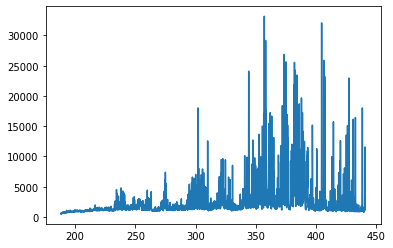

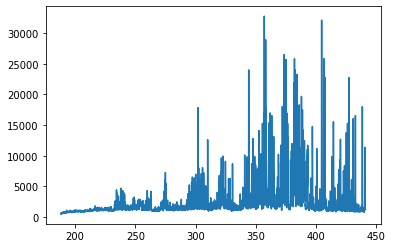

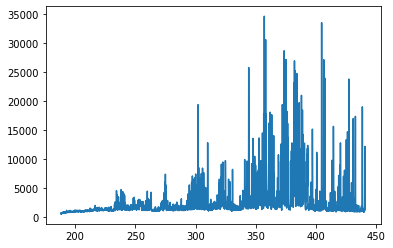

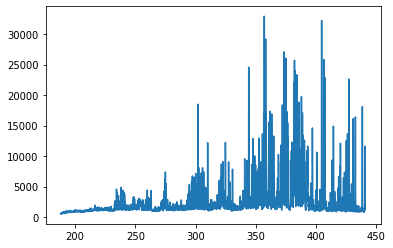

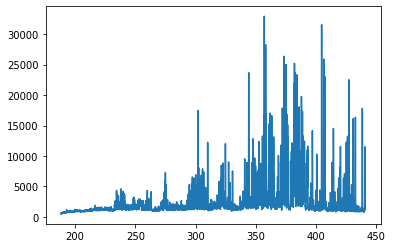

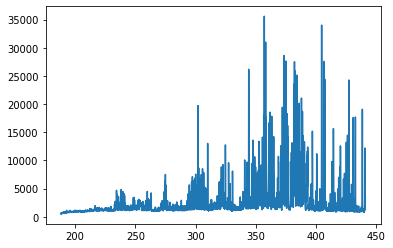

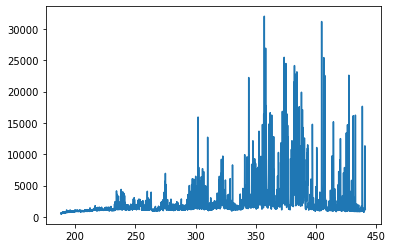

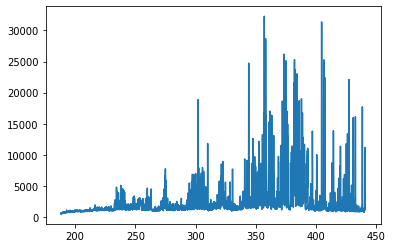

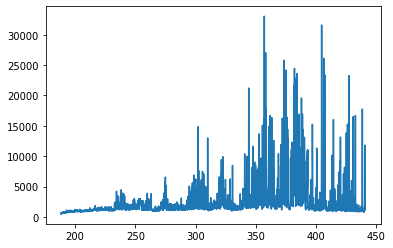

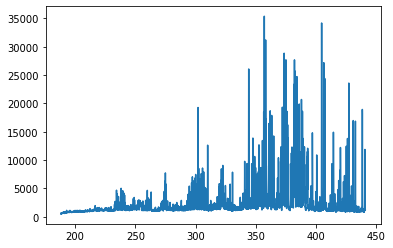

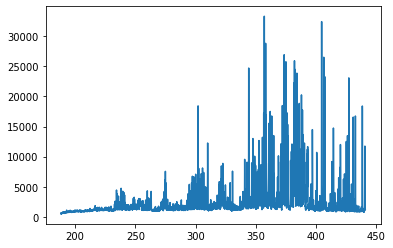

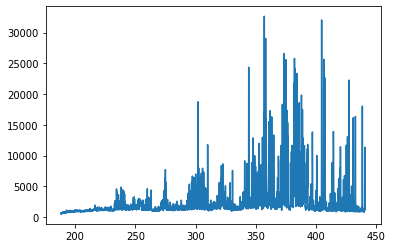

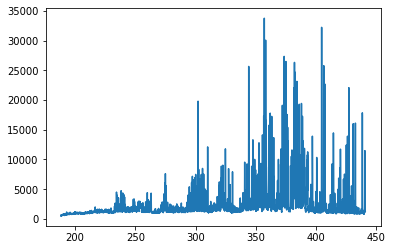

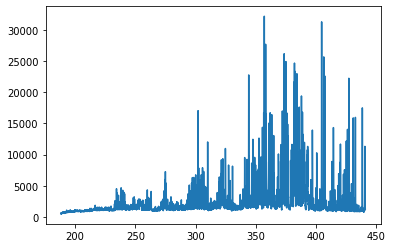

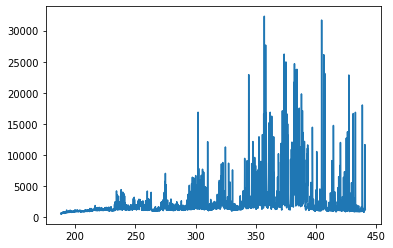

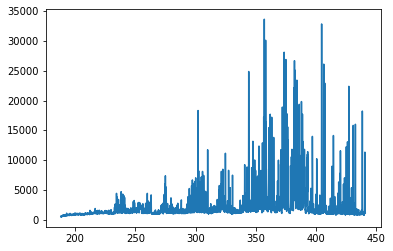

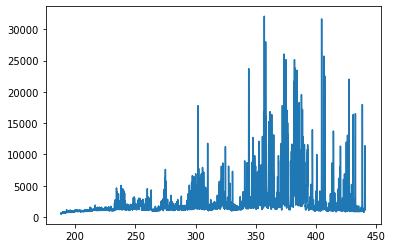

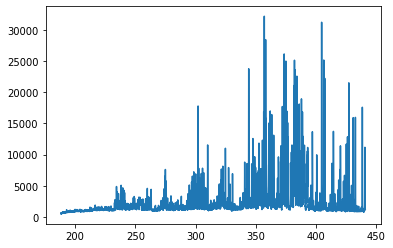

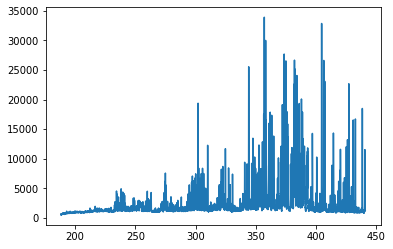

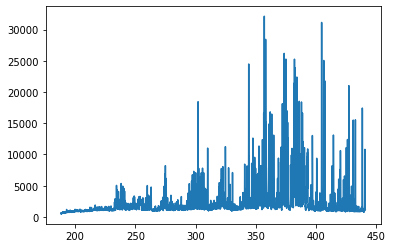

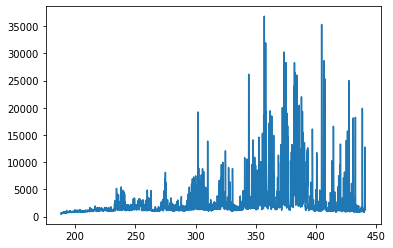

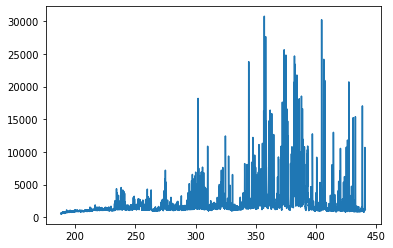

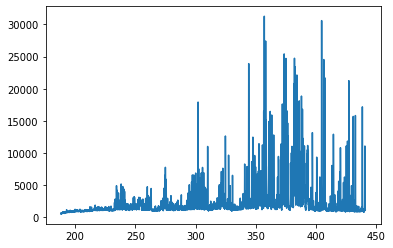

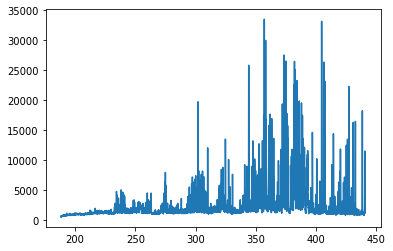

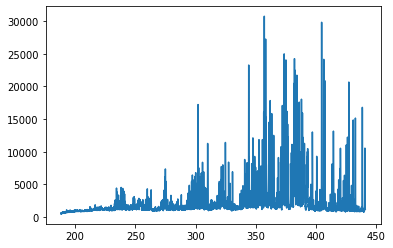

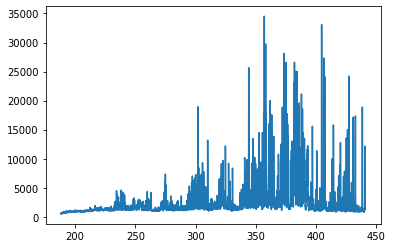

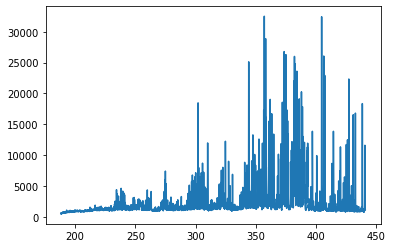

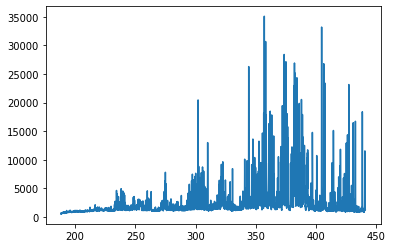

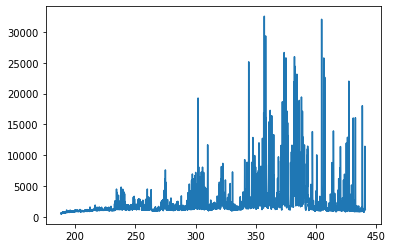

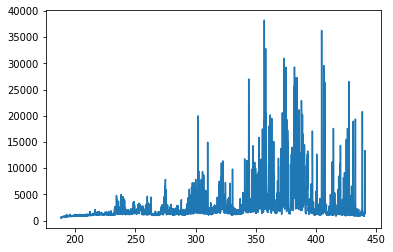

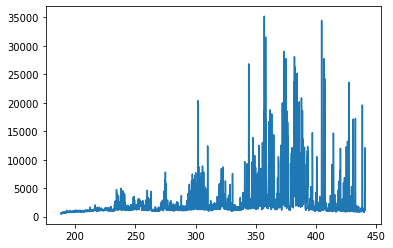

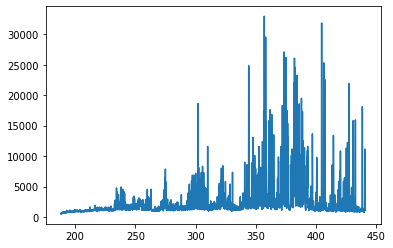

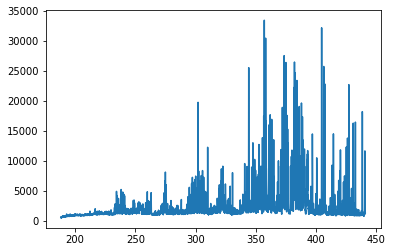

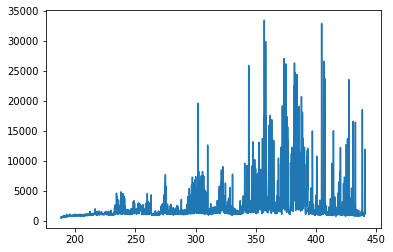

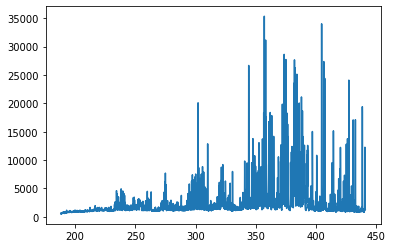

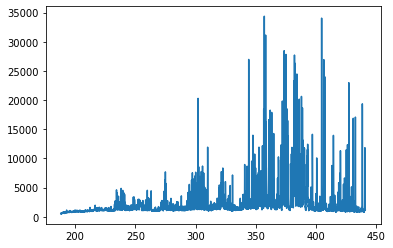

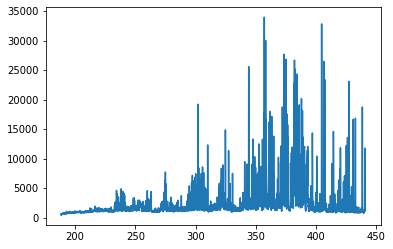

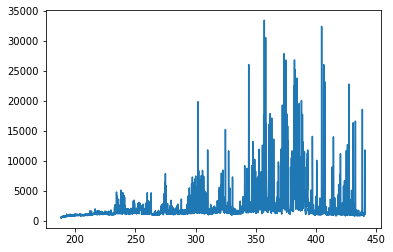

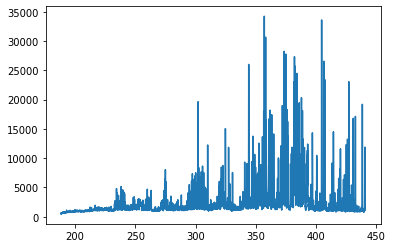

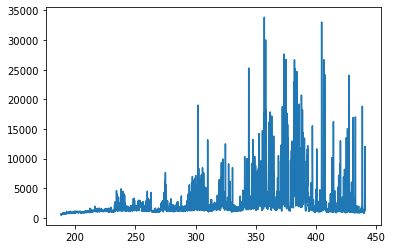

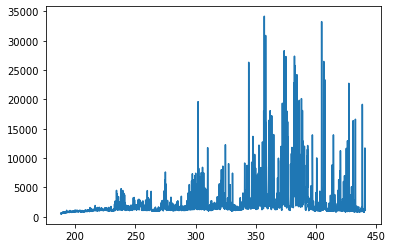

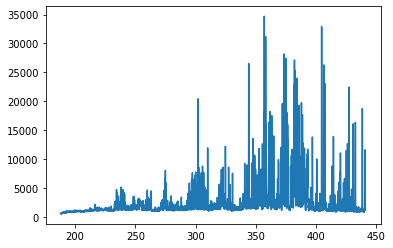

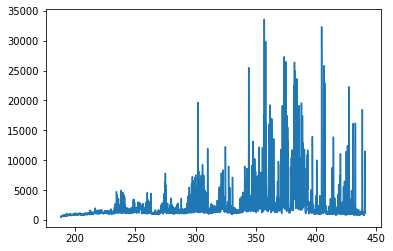

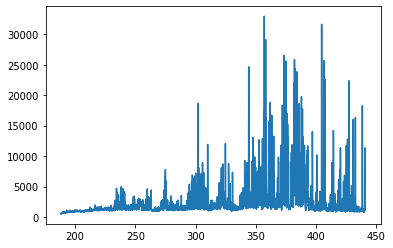

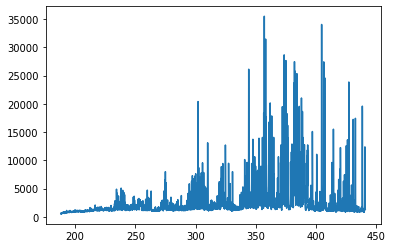

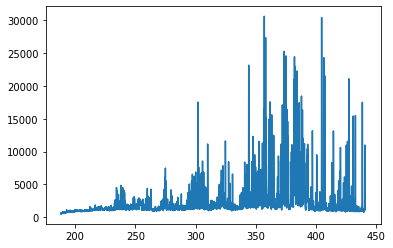

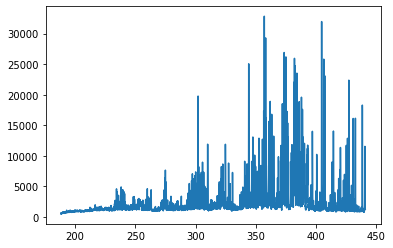

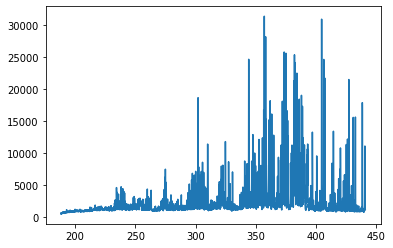

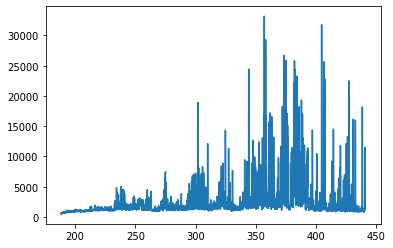

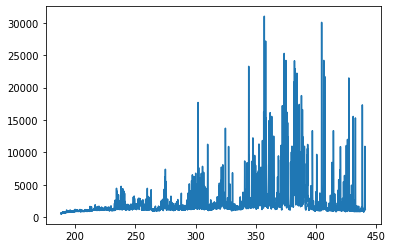

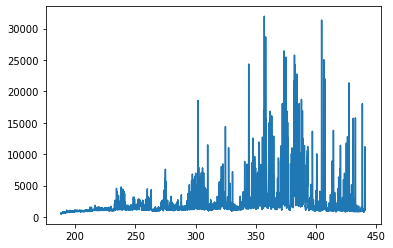

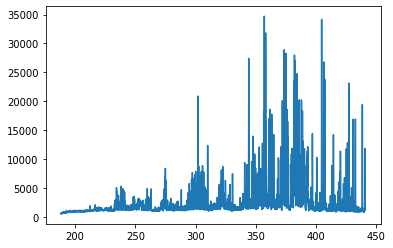

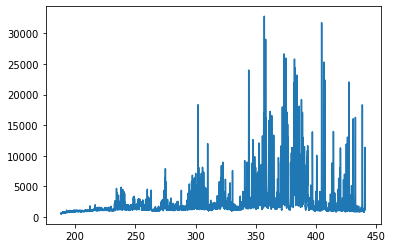

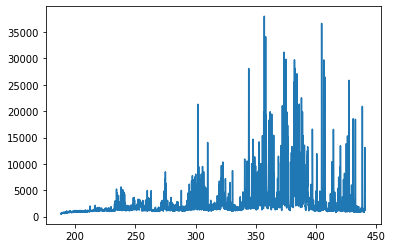

In [13]:
for i in range(len(tot)):
    plt.plot(wl, tot[i])
    plt.show()

In [24]:
print(wl.shape)
wl1= wl.reshape(1,-1)
print(tot.shape)

a= np.append(wl1, tot, axis=0)
print(a.shape)
a

(4093, 1)
(20, 4093)
(21, 4093)


array([[ 188.1951,  188.2601,  188.325 , ...,  440.6184,  440.6714,
         440.7245],
       [ 551.    ,  582.    ,  505.    , ..., 1593.    , 1423.    ,
        1283.    ],
       [ 562.    ,  583.    ,  500.    , ..., 1535.    , 1434.    ,
        1304.    ],
       ...,
       [ 553.    ,  598.    ,  518.    , ..., 1480.    , 1361.    ,
        1193.    ],
       [ 563.    ,  591.    ,  515.    , ..., 1522.    , 1392.    ,
        1276.    ],
       [ 568.    ,  600.    ,  522.    , ..., 1579.    , 1445.    ,
        1252.    ]])

In [25]:
np.savetxt("avg_intesities_reduced.csv", a, delimiter=",", fmt='%f')
#np.savetxt("avg_intesities.csv", a, delimiter=",", fmt='%f')

In [20]:
filenames = glob('./data/0*')
dfs = [pd.read_csv(f,sep='\t') for f in filenames]
#type(dfs) #dfs is a list of dataframes 

In [21]:
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

<class 'numpy.ndarray'>
(538, 4094)


In [22]:
x = data[0,:] #wavelengths
print(x.shape)
print(x)

(4094,)
[188.1951 188.2601 188.325  ... 440.6714 440.7245 440.7775]


In [23]:
y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)


(537, 4094)


In [24]:
print(len(dfs[0]))
print(len(df))
print(len(y))
#print(y)

538
538
537


In [25]:
y_2 = data[1:,2]
#print(y_2)
#print(len(y_2))


In [28]:
y_2 = data[1:,2] #2nd column of data without 1st element (wavelength)
#print(y_2)
#print(len(y_2))

y_norm= y_2 / y_2.max()
#print(y_norm)

#y_norm2= y_2 / y_2.max(axis=0)
#print(y_norm2)
#print(np.testing.assert_array_equal(y_norm2,y_norm))

Non-normalized version

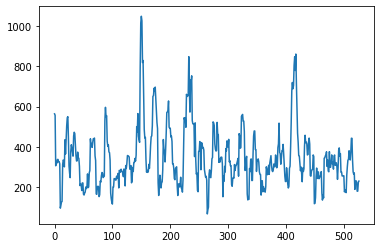

In [33]:
k=10

variance = []

for i in range(k, len(y_2)):
    #print(i)
    #print(y_2[i-k:i])
    tmp=y_2[i-k:i]
    #print(np.mean(tmp))
    
    variance.append(np.var(tmp))
    
    
#print(variance)
plt.plot(range(len(variance)),variance)
plt.show()

Normalized version

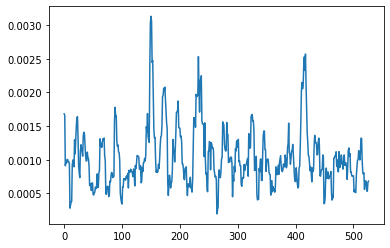

In [36]:
k=10

variance = []

for i in range(k, len(y_norm)):
    #print(i)
    #print(y_2[i-k:i])
    tmp=y_norm[i-k:i]
    #print(np.mean(tmp))
    
    variance.append(np.var(tmp))
    
    
#print(variance)
plt.plot(range(len(variance)),variance)
plt.show()

547


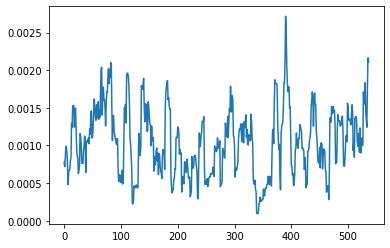

In [67]:
k=10

y_norm3= y / np.max(y,axis=0)
print(len(y_norm3[:,2]))
tmp_y= y_norm3[:,2]

var_n = []

for i in range(k, len(tmp_y)):
    #print(i)
    #print(tmp_y[i-k : i])
    tmp=tmp_y[i-k : i]
    #print(np.mean(tmp))
    
    var_n.append(np.var(tmp))
    
    
#print(var_n)
plt.plot(range(len(var_n)),var_n)
plt.show()


535


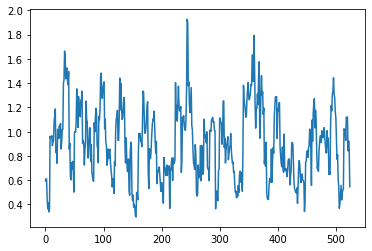

In [61]:
k=10

y_n = StandardScaler().fit_transform(y)
y_n
print(len(y_n[:,2]))
tmp_y= y_n[:,2]

var_n = []

for i in range(k, len(tmp_y)):
    #print(i)
    #print(tmp_y[i-k : i])
    tmp=tmp_y[i-k : i]
    #print(np.mean(tmp))
    
    var_n.append(np.var(tmp))
    
    
#print(var_n)
plt.plot(range(len(var_n)),var_n)
plt.show()

547


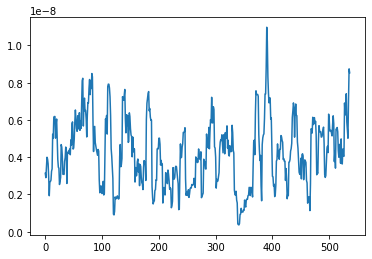

In [71]:
k=10

y_norm3= y / np.sum(y,axis=0)
print(len(y_norm3[:,2]))
tmp_y= y_norm3[:,2]

var_n = []

for i in range(k, len(tmp_y)):
    #print(i)
    #print(tmp_y[i-k : i])
    tmp=tmp_y[i-k : i]
    #print(np.mean(tmp))
    
    var_n.append(np.var(tmp))
    
    
#print(var_n)
plt.plot(range(len(var_n)),var_n)
plt.show()

547


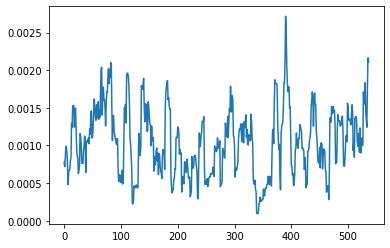

In [68]:
k=10

y_norm3= y / np.max(y,axis=0)
print(len(y_norm3[:,2]))
tmp_y= y_norm3[:,2]

var_n = []

for i in range(k, len(tmp_y)):
    #print(i)
    #print(tmp_y[i-k : i])
    tmp=tmp_y[i-k : i]
    #print(np.mean(tmp))
    
    var_n.append(np.var(tmp))
    
    
#print(var_n)
plt.plot(range(len(var_n)),var_n)
plt.show()


### for the whole range of measurements

In [37]:
print(len(y))
print(y.shape[1])

537
4094


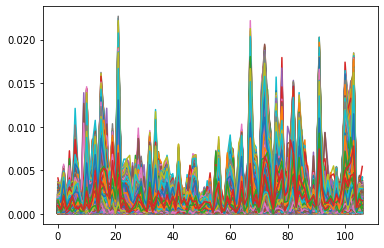

In [12]:
k=5

y_norm3= y / np.max(y,axis=0)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []

    for i in range(5,len(tmp_y)):
        #print(i)
        #print(tmp_y[i-5:i])
        tmp=tmp_y[i-5:i]
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    #print(var_n)
    plt.plot(range(len(var_n)),var_n)
#plt.show()


### With different samples

<class 'numpy.ndarray'>
(538, 4094)
(537, 4094)


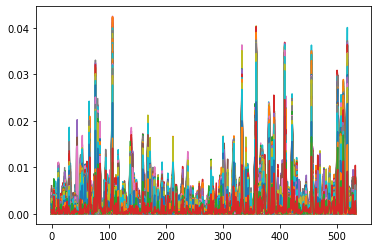

In [107]:
k = 2

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.show()


<class 'numpy.ndarray'>
(538, 4094)
(537, 4094)


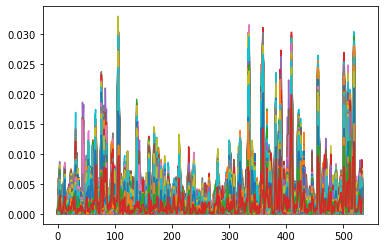

In [43]:
##

k = 3

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph.png')
plt.show()



<class 'numpy.ndarray'>
(538, 4094)
(537, 4094)


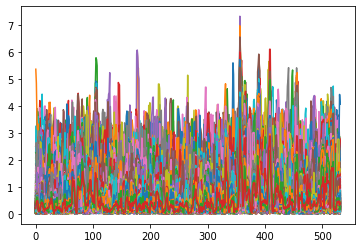

<Figure size 432x288 with 0 Axes>

In [62]:
k = 5

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm= StandardScaler().fit_transform(y)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.show()
plt.savefig('./plots/graph.png')


<Figure size 432x288 with 0 Axes>

<class 'numpy.ndarray'>
(538, 4094)
(537, 4094)
10


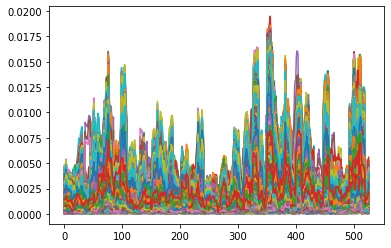

In [108]:
k = 10

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)


print(k)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.show()


<class 'numpy.ndarray'>
(538, 4094)
(537, 4094)
50


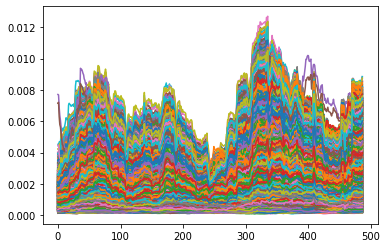

In [109]:
k = 50

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)

print(k)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.show()


### Max-normalization

In [85]:
len(dfs)

[         Pixels Unnamed: 1  Unnamed: 2         0         1        2       3  \
 0    Wavelength        NaN         NaN  188.1951  188.2601  188.325  188.39   
 1    2019-11-11   13:21:18   6859367.0  606.0000  486.0000  512.000  473.00   
 2    2019-11-11   13:21:18   6859382.0  585.0000  491.0000  480.000  482.00   
 3    2019-11-11   13:21:18   6859398.0  566.0000  473.0000  538.000  479.00   
 4    2019-11-11   13:21:18   6859413.0  583.0000  524.0000  543.000  495.00   
 ..          ...        ...         ...       ...       ...      ...     ...   
 533  2019-11-11   13:21:19   6867348.0  586.0000  492.0000  529.000  477.00   
 534  2019-11-11   13:21:19   6867362.0  577.0000  493.0000  530.000  475.00   
 535  2019-11-11   13:21:19   6867378.0  598.0000  495.0000  556.000  475.00   
 536  2019-11-11   13:21:19   6867393.0  617.0000  521.0000  544.000  484.00   
 537  2019-11-11   13:21:19   6867407.0  588.0000  473.0000  511.000  473.00   
 
            4       5        6  ...   

<class 'numpy.ndarray'>
(534, 4094)
(533, 4094)
k:  2


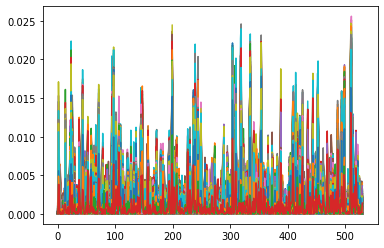

k:  3


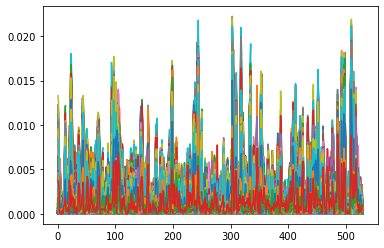

k:  5


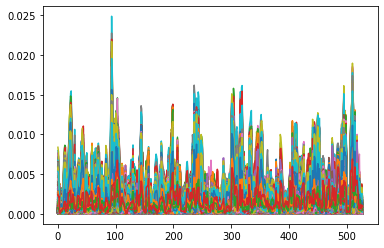

k:  10


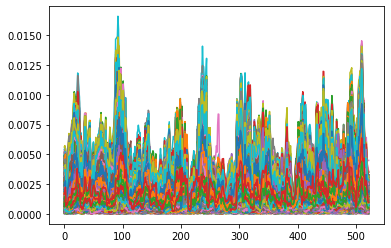

k:  50


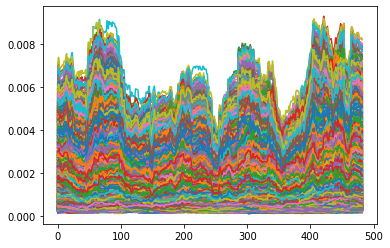

In [86]:
k1=2
k2=3
k3=5
k4=10
k5=50

##
df=dfs[21].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)

print("k: ", k1)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k1, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k1 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df21_k' + str(k1) +'.png')
plt.show()


print("k: ", k2)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k2, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k2 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df21_k' + str(k2) +'.png')
plt.show()


print("k: ", k3)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k3, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k3 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df21_k' + str(k3) +'.png')
plt.show()


print("k: ", k4)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k4, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k4 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df21_k' + str(k4) +'.png')
plt.show()


print("k: ", k5)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k5, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k5 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df21_k' + str(k5) +'.png')
plt.show()


<class 'numpy.ndarray'>
(574, 4094)
(573, 4094)
k:  2


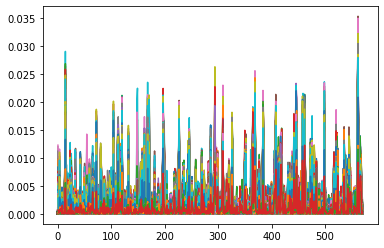

k:  3


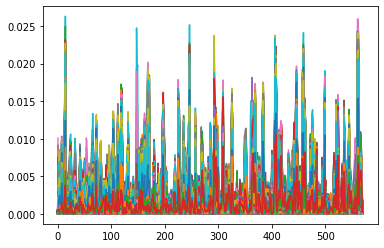

k:  5


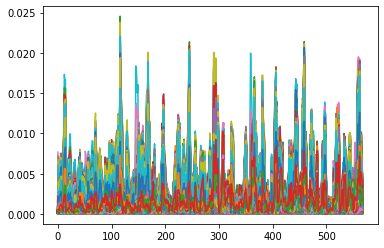

k:  10


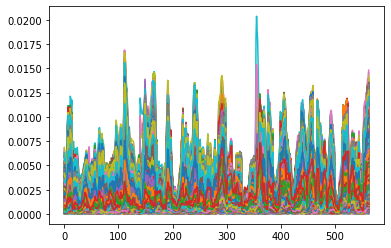

k:  50


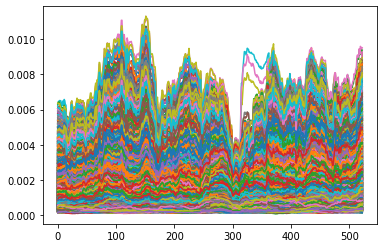

In [87]:
k1=2
k2=3
k3=5
k4=10
k5=50

##
df=dfs[22].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)

print("k: ", k1)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k1, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k1 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df22_k' + str(k1) +'.png')
plt.show()


print("k: ", k2)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k2, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k2 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df22_k' + str(k2) +'.png')
plt.show()


print("k: ", k3)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k3, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k3 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df22_k' + str(k3) +'.png')
plt.show()


print("k: ", k4)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k4, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k4 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df22_k' + str(k4) +'.png')
plt.show()


print("k: ", k5)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k5, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k5 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df22_k' + str(k5) +'.png')
plt.show()



<class 'numpy.ndarray'>
(539, 4094)
(538, 4094)
k:  2


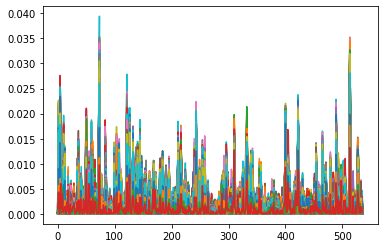

k:  3


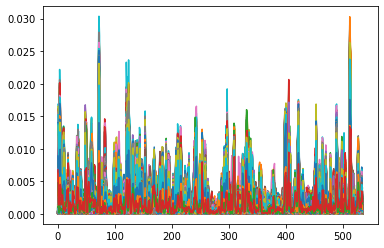

k:  5


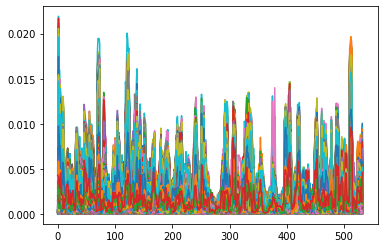

k:  10


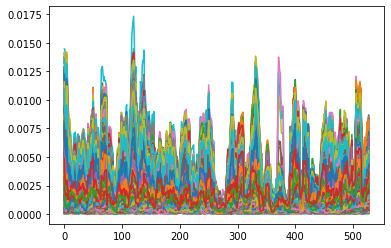

k:  50


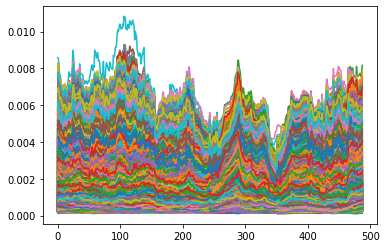

In [88]:
k1=2
k2=3
k3=5
k4=10
k5=50

##
df=dfs[23].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)

y_norm3= y / np.max(y,axis=0)

print("k: ", k1)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k1, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k1 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df23_k' + str(k1) +'.png')
plt.show()


print("k: ", k2)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k2, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k2 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df23_k' + str(k2) +'.png')
plt.show()


print("k: ", k3)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k3, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k3 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df23_k' + str(k3) +'.png')
plt.show()


print("k: ", k4)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k4, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k4 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df23_k' + str(k4) +'.png')
plt.show()


print("k: ", k5)

for j in range(y.shape[1]):
    tmp_y= y_norm3[:,j]

    var_n = []
    #print(j)
    for i in range(k5, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k5 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/graph_df23_k' + str(k5) +'.png')
plt.show()


### Standardized version (mean = 0, std = 1)

In [ ]:
k1=2
k2=3
k3=5
k4=10
k5=50

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)
 
y_norm= StandardScaler().fit_transform(y)

print("k: ", k1)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k1, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k1 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/stand_df0_k' + str(k1) +'.png')
plt.show()


print("k: ", k2)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k2, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k2 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/stand_df0_k' + str(k2) +'.png')
plt.show()


print("k: ", k3)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k3, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k3 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/stand_df0_k' + str(k3) +'.png')
plt.show()


print("k: ", k4)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k4, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k4 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/stand_df0_k' + str(k4) +'.png')
plt.show()


print("k: ", k5)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k5, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k5 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/stand_df0_k' + str(k5) +'.png')
plt.show()



### Varaince using sum-normalization

<class 'numpy.ndarray'>
(538, 4094)
(537, 4094)
k:  2


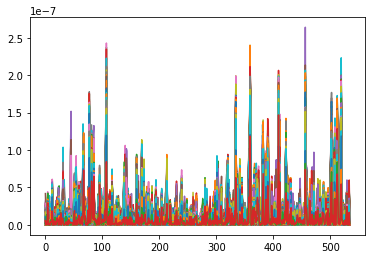

k:  3


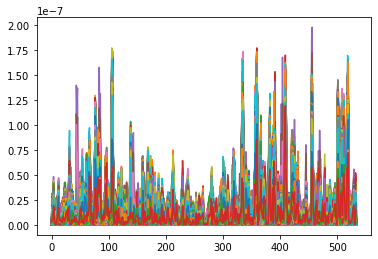

k:  5


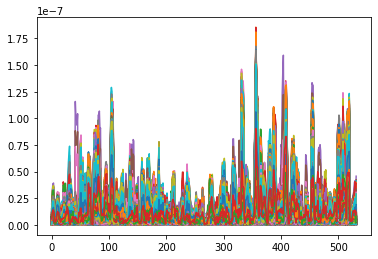

k:  10


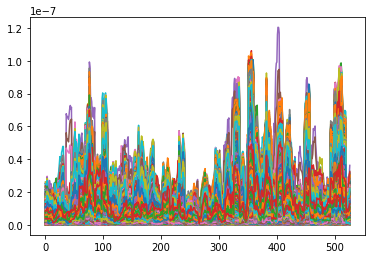

k:  50


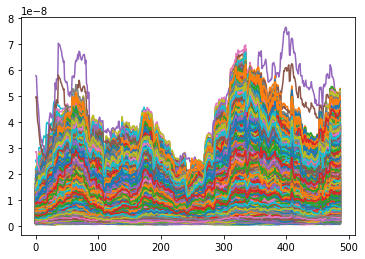

In [72]:
k1=2
k2=3
k3=5
k4=10
k5=50

##
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
#plt.plot(data[0], data[400])

print(type(data))
#print(data)
print(data.shape)

y = data[1:,:] #intensities
#print(y)
print(y.shape)
#np.asmatrix(y)
 
y_norm = y / np.sum(y,axis=0)

print("k: ", k1)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k1, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k1 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/sum_df0_k' + str(k1) +'.png')
plt.show()


print("k: ", k2)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k2, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k2 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/sum_df0_k' + str(k2) +'.png')
plt.show()


print("k: ", k3)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k3, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k3 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/sum_df0_k' + str(k3) +'.png')
plt.show()


print("k: ", k4)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k4, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k4 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/sum_df0_k' + str(k4) +'.png')
plt.show()


print("k: ", k5)

for j in range(y.shape[1]):
    tmp_y= y_norm[:,j]

    var_n = []
    #print(j)
    for i in range(k5, len(tmp_y)):  # modify k!!
        #print(i)
        #print(tmp_y[i - k:i])
        tmp=tmp_y[i - k5 : i]  # modify k!!
        #print(np.mean(tmp))

        var_n.append(np.var(tmp))
    
    
    
    plt.plot(range(len(var_n)),var_n)
plt.savefig('./plots/sum_df0_k' + str(k5) +'.png')
plt.show()



In [21]:
y_avg0 = np.mean(y, axis=0) #average of intensities

y_avg = y_avg0 # this will be used to append other means

print(y_avg.shape)
print(y_avg)

(4094,)
[ 582.46368715  504.20856611  530.70949721 ... 2177.94599628 1990.0744879
 1936.0689013 ]


In [22]:
#for i in range(0, len(dfs)):
for i in range(0, len(dfs),3):
    df=dfs[i].drop(columns=['Pixels']) 
    df=df.dropna(axis=1)
    data=df.values
    #plt.plot(data[0], data[400])
    #print(data)
    print("data index: " + str(i))
    print(data.shape)
    tmp_y = data[1:,:] #intensities
    y_avg = np.mean(tmp_y, axis=0) #average of intensities
    x = np.vstack([x, y_avg])
print(x)    

data index: 0
(538, 4094)
data index: 3
(571, 4094)
data index: 6
(565, 4094)
data index: 9
(536, 4094)
data index: 12
(536, 4094)
data index: 15
(559, 4094)
data index: 18
(534, 4094)
data index: 21
(534, 4094)
data index: 24
(530, 4094)
data index: 27
(518, 4094)
data index: 30
(619, 4094)
data index: 33
(542, 4094)
data index: 36
(560, 4094)
data index: 39
(536, 4094)
data index: 42
(535, 4094)
data index: 45
(533, 4094)
data index: 48
(546, 4094)
data index: 51
(532, 4094)
data index: 54
(522, 4094)
data index: 57
(527, 4094)
[[ 188.1951      188.2601      188.325      ...  440.6714
   440.7245      440.7775    ]
 [ 582.46368715  504.20856611  530.70949721 ... 2177.94599628
  1990.0744879  1936.0689013 ]
 [ 577.81403509  501.42807018  528.21929825 ... 2129.03684211
  1942.41929825 1889.0754386 ]
 ...
 [ 579.5819209   503.76082863  528.76271186 ... 2222.36723164
  1961.93785311 1889.83992467]
 [ 582.13819578  505.18426104  530.81957774 ... 2111.6487524
  1859.09021113 1771.47984645]

# Principal component analysis

In [2]:
n_components=10

x_df = pd.read_csv('data_with_avg_intesities.csv', sep = ',')
x = x_df.values
print(x.shape)
print(x[1].shape)
print(len(x))


# This has to be used later for regression, PCA is done on X only
"""
y_df = pd.read_csv('labels_aligned+.csv', sep = ',')
concentration=y_df.values
#print(concentration)
multi_y = concentration[:,2:]
#print (multi_y)
print (multi_y.shape)
multi_y= np.array(multi_y, dtype=np.float)
y=np.around(multi_y, decimals=4)
#print(y)
"""

# PCA

X_std = StandardScaler().fit_transform(x)
#print(X_std)

pca = PCA(n_components= n_components)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
print(principalComponents.shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3'])
#print(principalDf)


#print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
#print(pca.singular_values_)

(59, 4094)
(4094,)
59
(59, 10)
[60.64 75.34 85.82 92.57 94.44 95.95 96.69 97.36 97.88 98.2 ]


### This is the normal (mathematical) way to do it

In [ ]:
cov_mat = np.cov(X_std.T) #covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp.real)
#print(np.round(cum_var_exp[:10].real, decimals=2)) # same as above but only first 10 elements

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4094), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4094), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs[:20]: #only first 20 eigenvalues
    print(i[0])

Eigenvalues in descending order:
2525.2699534212234
611.9902215269108
436.428772395369
281.2477997687792
77.66985547488734
62.916313292914616
30.77686857208958
27.834968059465698
21.53525273320878
13.414283705592364
12.552859139005394
7.148323450905083
3.741250198480593
3.4205261458039633
2.5106875575011154
2.11984708859075
1.8065778868116886
1.7663224315305952
1.7128372961036151
1.6546841752647674
